In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

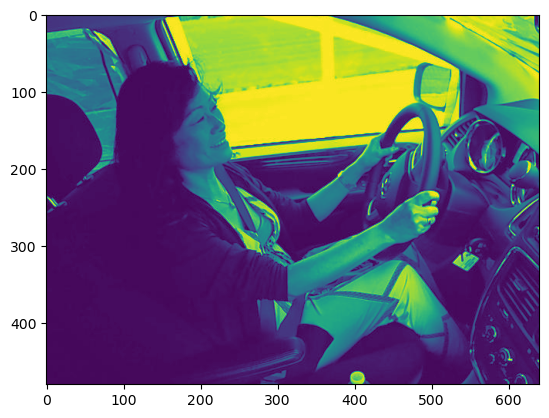

In [2]:
# base directory where the dataset (train set) is located.
base_dir = 'D:/JATHURSH/SEMI-06/project/state-farm-distracted-driver-detection/imgs/train'

# analyze images
img_array = cv2.imread(base_dir + '/c0/img_2101.jpg', cv2.IMREAD_GRAYSCALE)

# Display the grayscale image with the "viridis" colormap.
plt.imshow(img_array, cmap='viridis')
plt.show()

In [3]:
img_array.shape

(480, 640)

In [4]:
# Create an empty list to store image-label pairs.
traindata = []
img_size = 224

# Create a mapping from class directory names to numeric labels.
class_to_label = {f'c{i}': i for i in range(10)}  # 10 classes (c0 to c10).


# Loop through the class directories (c0, c1, ..., c10).
for class_dir in os.listdir(base_dir):
    if os.path.isdir(os.path.join(base_dir, class_dir)):
        class_label = class_to_label[class_dir]  # Map directory name to numeric label. (0,1,..,10)

        # Loop through the image files within each class directory.
        for image_file in os.listdir(os.path.join(base_dir, class_dir)):
            if image_file.endswith('.jpg'):
                image_path = os.path.join(base_dir, class_dir, image_file)
            
                img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                back_to_rgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_img_array = cv2.resize(back_to_rgb, (img_size, img_size))
                traindata.append([new_img_array, class_label])

In [5]:
len(traindata)

22424

In [6]:
traindata

[[array([[[ 32,  32,  32],
          [ 36,  36,  36],
          [ 38,  38,  38],
          ...,
          [158, 158, 158],
          [163, 163, 163],
          [233, 233, 233]],
  
         [[ 39,  39,  39],
          [ 38,  38,  38],
          [ 35,  35,  35],
          ...,
          [173, 173, 173],
          [234, 234, 234],
          [238, 238, 238]],
  
         [[ 36,  36,  36],
          [ 39,  39,  39],
          [ 18,  18,  18],
          ...,
          [231, 231, 231],
          [223, 223, 223],
          [188, 188, 188]],
  
         ...,
  
         [[ 48,  48,  48],
          [ 53,  53,  53],
          [ 54,  54,  54],
          ...,
          [ 14,  14,  14],
          [ 13,  13,  13],
          [ 13,  13,  13]],
  
         [[ 48,  48,  48],
          [ 51,  51,  51],
          [ 56,  56,  56],
          ...,
          [ 16,  16,  16],
          [ 10,  10,  10],
          [ 11,  11,  11]],
  
         [[ 90,  90,  90],
          [ 63,  63,  63],
          [ 57,  57,  57

In [7]:
import random

# Shuffle 
random.shuffle(traindata)

In [8]:
# Separate features and labels into X and y.
X = []
y = []

for features, labels in traindata:
    X.append(features)
    y.append(labels)

# Convert the lists to NumPy arrays and reshape X.
X = np.array(X).reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [9]:
X.shape, y.shape

((22424, 224, 224, 3), (22424,))

In [11]:
# Save X and y as separate files.
save_dir = 'D:/JATHURSH/Jupyter_notebook_projects/DistractionDetection/saved_data/features_and_labels/'
np.save(save_dir + 'X.npy', X)
np.save(save_dir + 'y.npy', y)

4

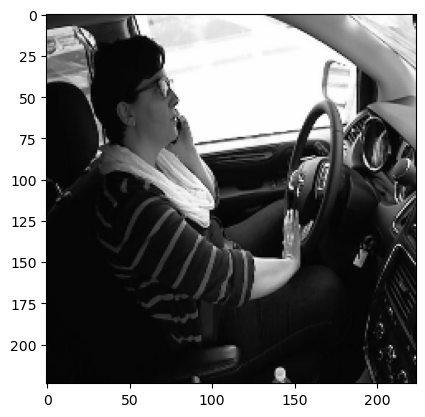

In [12]:
plt.imshow(X[5023], cmap="gray")
y[5023]

In [13]:
# train, validation split
from sklearn.model_selection import train_test_split

# Split the data into a training set and a validation set (90% training, 10% val)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=0)

In [14]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(20181, 224, 224, 3) (2243, 224, 224, 3) (20181,) (2243,)


In [15]:
# Save X_train, X_val, y_train, y_val
save_dir = 'D:/JATHURSH/Jupyter_notebook_projects/DistractionDetection/saved_data/train_val_split/'
np.save(save_dir + 'X_train.npy', X_train)
np.save(save_dir + 'X_val.npy', X_val)
np.save(save_dir + 'y_train.npy', y_train)
np.save(save_dir + 'y_val.npy', y_val)

In [16]:
# delete unwanted arrays to free up mem
del traindata
del X
del y

In [17]:
# Normalizing using mobilNetV2 - preprocess_input method (it normalizes from 0 - 255 to -1 - 1 and returns in float32)
X_train_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(X_train)
X_val_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(X_val)

In [18]:
X_train_preprocessed.min(), X_train_preprocessed.max(), X_val_preprocessed.min(), X_val_preprocessed.max()

(-1.0, 1.0, -1.0, 1.0)

In [20]:
# Save preprocessed X_train, X_val, y_train, and y_val
save_dir = 'D:/JATHURSH/Jupyter_notebook_projects/DistractionDetection/saved_data/train_val_test_preprocessed/'
np.save(save_dir + 'X_train_preprocessed.npy', X_train_preprocessed)
np.save(save_dir + 'X_val_preprocessed.npy', X_val_preprocessed)

In [21]:
# delete unwanted arrays to free up mem
del X_train
del X_val
del y_train
del y_val
del X_train_preprocessed
del X_val_preprocessed

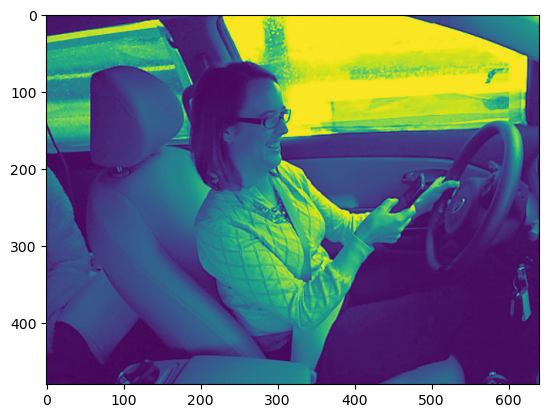

In [23]:
# base directory where the test set is located.
base_dir_test = 'D:/JATHURSH/SEMI-06/project/state-farm-distracted-driver-detection/imgs/test'

# analyze images
img_array = cv2.imread(base_dir_test + '/img_134.jpg', cv2.IMREAD_GRAYSCALE)

# Display the grayscale image with the "viridis" colormap.
plt.imshow(img_array, cmap='viridis')
plt.show()

In [25]:
# Create an empty list to store test image data.
testdata = []

# Loop through the image files within the test directory.
for image_file in os.listdir(base_dir_test):
    if image_file.endswith('.jpg'):
        image_path = os.path.join(base_dir_test, image_file)

        img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        back_to_rgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        new_img_array = cv2.resize(back_to_rgb, (img_size, img_size))
        testdata.append(new_img_array)

In [26]:
len(testdata)

79726

In [27]:
# Convert the lists to NumPy arrays and reshape testdata.
X_test = np.array(testdata).reshape(-1, img_size, img_size, 3)

In [28]:
del testdata

In [29]:
X_test_preprocessed = tf.keras.applications.mobilenet_v2.preprocess_input(X_test)

MemoryError: Unable to allocate 44.7 GiB for an array with shape (79726, 224, 224, 3) and data type float32